In [8]:
import tensorflow as tf 
from keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
import cv2
import imghdr
from PIL import Image

In [9]:
data_dir = 'dataset'

In [10]:
image_exts = ['jpeg', 'jpg', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [12]:
data=[]
labels=[]

In [13]:
classes = os.listdir(data_dir)
for class_label in classes:
    class_path = os.path.join(data_dir, class_label)
    image_files = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(".jpg") or img.endswith(".jpeg")]
    for image_file in image_files:
        img=cv2.imread(image_file)
        img=cv2.resize(img,(32,32))
        data.append(img)
        labels.append(class_label)

In [14]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [15]:
x_train=np.array(train_data)
x_test=np.array(test_data)
y_train=np.array(train_labels,dtype='uint8')
y_test=np.array(test_labels,dtype='uint8')
print(x_train.shape)
x_test.shape

(1019, 32, 32, 3)


(255, 32, 32, 3)

In [16]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

In [17]:
lclasses = ["Animals","Humans","Plants","Non-Liv"]

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index],cmap='gray')
    plt.xlabel(lclasses[y[index]])
    

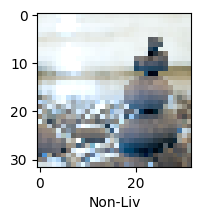

In [19]:
plot_sample(x_train, y_train, 1018)

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



ann_history = ann.fit(x_train, y_train, batch_size= 32,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 34ms/step - loss: 1.6722 - accuracy: 0.2640
Epoch 2/20
32/32 [==============================] - 1s 34ms/step - loss: 1.2963 - accuracy: 0.4210
Epoch 3/20
32/32 [==============================] - 1s 34ms/step - loss: 1.2563 - accuracy: 0.4553
Epoch 4/20
32/32 [==============================] - 1s 34ms/step - loss: 1.2204 - accuracy: 0.4995
Epoch 5/20
32/32 [==============================] - 1s 35ms/step - loss: 1.1274 - accuracy: 0.5397
Epoch 6/20
32/32 [==============================] - 1s 36ms/step - loss: 1.1007 - accuracy: 0.5613
Epoch 7/20
32/32 [==============================] - 1s 38ms/step - loss: 1.0107 - accuracy: 0.6094
Epoch 8/20
32/32 [==============================] - 1s 35ms/step - loss: 0.9863 - accuracy: 0.6359
Epoch 9/20
32/32 [==============================] - 1s 35ms/step - loss: 0.9530 - accuracy: 0.6379
Epoch 10/20
32/32 [==============================] - 1s 34ms/step - loss: 0.9264 - accuracy: 0.6526
Epoch 11/

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

cnn = keras.Sequential()

cnn.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (2, 2), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(128, activation='relu'))

cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [23]:
cnn_hist = cnn.fit(x_train, y_train, epochs=20 )

Epoch 1/20
32/32 [==============================] - 1s 11ms/step - loss: 1.4599 - accuracy: 0.3248
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 1.2587 - accuracy: 0.4298
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 1.0510 - accuracy: 0.5810
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.9647 - accuracy: 0.6241
Epoch 5/20
32/32 [==============================] - 0s 11ms/step - loss: 0.8573 - accuracy: 0.6703
Epoch 6/20
32/32 [==============================] - 0s 11ms/step - loss: 0.8004 - accuracy: 0.7085
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.7444 - accuracy: 0.7311
Epoch 8/20
32/32 [==============================] - 0s 12ms/step - loss: 0.6673 - accuracy: 0.7537
Epoch 9/20
32/32 [==============================] - 0s 12ms/step - loss: 0.6817 - accuracy: 0.7252
Epoch 10/20
32/32 [==============================] - 0s 11ms/step - loss: 0.6083 - accuracy: 0.7929
Epoch 11/

In [24]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(x_test, y_test)
print(cnn_test_accuracy*100, "%")

8/8 [==============================] - 0s 5ms/step - loss: 0.8319 - accuracy: 0.7333
73.33333492279053 %


In [25]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test)

print("Test Loss : ", test_loss)
print("Test Accuracy : ", test_accuracy)

8/8 [==============================] - 0s 9ms/step - loss: 1.1717 - accuracy: 0.5098
Test Loss :  1.17165207862854
Test Accuracy :  0.5098039507865906


Test Loss: 1.17165207862854
Test Accuracy: 50.98039507865906 %


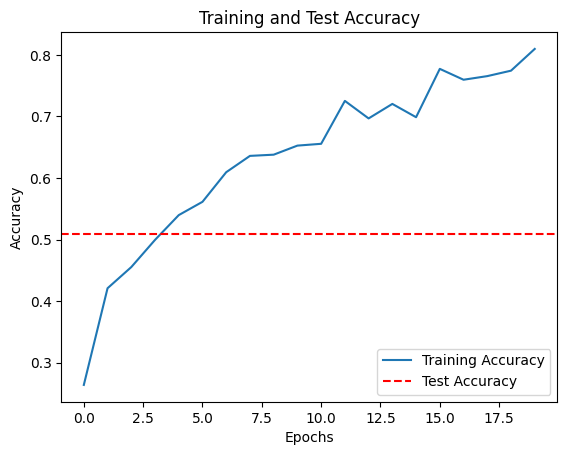

In [26]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100, "%")

plt.plot(ann_history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.show()

0.9528949856758118


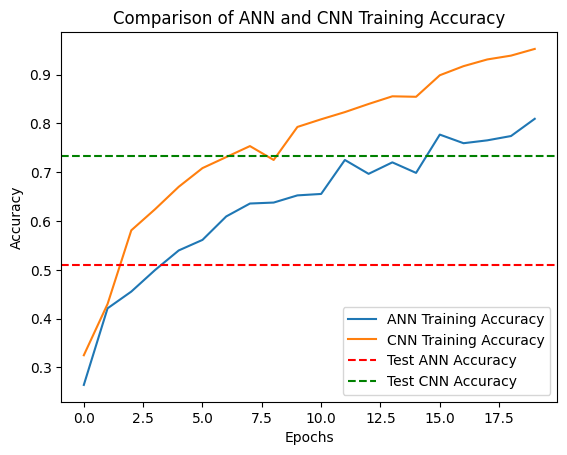

In [27]:
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(cnn_hist.history['accuracy'], label='CNN Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test ANN Accuracy')
plt.axhline(y=cnn_test_accuracy, color='g', linestyle='--', label='Test CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Comparison of ANN and CNN Training Accuracy')

print(max(cnn_hist.history['accuracy']))
plt.show()

In [28]:
# model_5_epochs = ann.fit(x_train, y_train, epochs=5)
# print("Trained for 5 epochs")
# model_20_epochs = ann.fit(x_train, y_train, epochs=20)
# print("Trained for 20 epochs")
# plt.plot(model_5_epochs.history['accuracy'], label='5 Epochs')
# plt.plot(model_20_epochs.history['accuracy'], label='20 Epochs')

# plt.title('Model Accuracy Comparison')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

# max_acc_5_epochs = max(model_5_epochs.history['accuracy'])
# max_acc_20_epochs = max(model_20_epochs.history['accuracy'])
# print("Maximum accuracy for 5 epochs : ", max_acc_5_epochs*100, " %")
# print("Maximum accuracy for 20 epochs : ", max_acc_20_epochs*100, " %")


Manual Testing

In [29]:
y_pred = cnn.predict(x_test)
y_pred[:5]


8/8 [==============================] - 0s 5ms/step


array([[9.9859697e-01, 2.5557791e-04, 8.3357311e-04, 3.1394884e-04,
        3.6796749e-10, 6.8608758e-10, 1.6855319e-11, 1.2711323e-11,
        2.3773314e-10, 1.1416017e-12],
       [5.6108744e-03, 9.8943466e-01, 1.1743301e-03, 3.7796313e-03,
        7.0399786e-08, 8.0840699e-08, 4.8100137e-08, 1.7110445e-08,
        1.8578906e-07, 1.2696449e-08],
       [3.2076809e-01, 3.8967174e-02, 6.3968199e-01, 5.8268401e-04,
        1.2560869e-08, 2.7509554e-08, 2.3603155e-09, 9.3424379e-10,
        2.8833007e-08, 1.4428044e-09],
       [2.4142615e-01, 1.8072415e-02, 7.3886615e-01, 1.6331356e-03,
        4.3386223e-07, 8.1305893e-07, 9.6733366e-08, 6.7955476e-08,
        6.9436652e-07, 5.5906437e-08],
       [1.2335690e-01, 8.3499163e-01, 3.7294634e-02, 4.3133246e-03,
        9.8721257e-06, 9.5536579e-06, 4.0398950e-06, 2.3127327e-06,
        1.5287345e-05, 2.5465547e-06]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 1, 2, 2, 1]

In [31]:
y_test[:5]

array([0, 1, 0, 2, 1], dtype=uint8)

In [32]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

In [ ]:
classes[y_classes[3]]

'0'

0


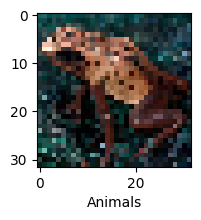

In [ ]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

3


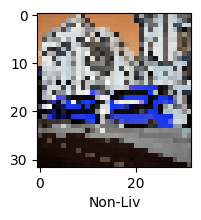

In [ ]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

1


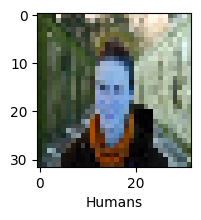

In [ ]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)

0


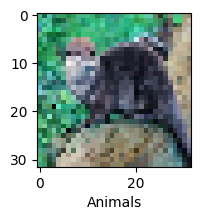

In [ ]:
a= int(input("Enter index:"))
print(y_test[a])
plot_sample(x_test, y_test, a)